<a href="https://colab.research.google.com/github/SwethaSrikari/Math/blob/main/Central_Limit_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding Central Limit Theorem using Python**

Reference - [Central Limit Theorem](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html#:~:text=The%20central%20limit%20theorem%20states,will%20be%20approximately%20normally%20distributed.)

**Central Limit Theorem**

The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed.

What this means? - If you sample values (with replacement) from the true population many times and calculate sample mean at each trial, the distribution of the sample means resembles a normal distribution with the mean the of sample means distribution approximately equal or close to the true population mean. 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

### 1 - If the source population is normally distributed, then the sample means will have a normal distribution even when the sample size is less than 30 - `n < 30`, where `n` is the sample size

In [2]:
# True population with normal distribution
np.random.seed(128)
sample1 = np.random.normal(3.5, 1.5, 100000) # mean=3.5, std_dev=1.5, sample_size=100000

**Check - source population is normally distributed**

Text(0.5, 1.0, 'Distribution of random variable X with sample mean 3.5 and standard deviation 1.5')

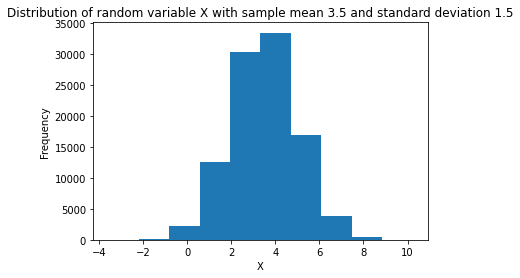

In [3]:
# Histogram showing the distribution of samples with their frequencies on y axis
plt.hist(sample1)
plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('Distribution of random variable X with sample mean 3.5 and standard deviation 1.5')

In [4]:
# Randomly sampling 10 samples and calculating their sample means ans standard deviations 10000 times
sample1_means = []
sample1_std = []
for i in range(10000):
  sample = np.random.choice(sample1, 10) # Randomly sample 10 values from sample1 with replacement
  sample1_means.append(np.mean(sample)) # Calculate the mean for each trial
  sample1_std.append(np.std(sample)) # Calculate the std_dev for each trial

**Check - distribution of sample means is also normally distributed**

Text(0.5, 1.0, 'Distribution of sample means')

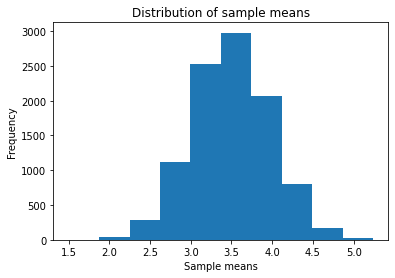

In [5]:
plt.hist(sample1_means)
plt.xlabel('Sample means')
plt.ylabel('Frequency')
plt.title('Distribution of sample means')

**Check - The average of the sample means and sample standard deviation should be close to the true population mean 3.5 and true standard deviation 1.5 respectively**

In [6]:
print('Mean of the sample means', np.mean(sample1_means))
print('Mean of the sample standard deviations', np.mean(sample1_std))

Mean of the sample means 3.4997537973830783
Mean of the sample standard deviations 1.3845785282053071


### 2 - Even if the source population is not normally distributed, the sample means will have normal distribution when the sample size is more than 30 - `n > 30`, where `n` is the sample size. As the sample size `n` increases, the standard error of the sample means `σ / sqrt(n)` decreases and vice versa; where `σ` is the true standard deviation

In [7]:
# True population with poisson distribution
np.random.seed(128)
sample2 = np.random.poisson(5, 100000) # mean=5, sample_size=100000
mean_2 = np.mean(sample2)
std_dev2 = np.std(sample2)
print('Population mean and standard deviation - ', mean_2, ',', std_dev2)

Population mean and standard deviation -  4.99531 , 2.242063336282006


**Check - Distribution is not normal**

Text(0.5, 1.0, 'Distribution of random variable X with sample mean 5 and standard deviation 2.24')

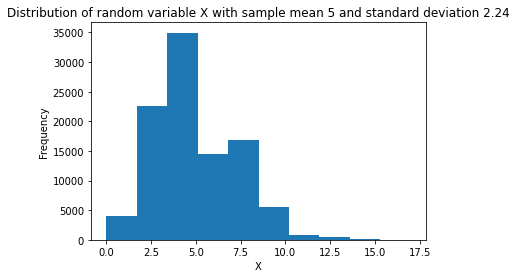

In [8]:
# Histogram showing the distribution of samples with their frequencies on y axis
plt.hist(sample2)
plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('Distribution of random variable X with sample mean 5 and standard deviation 2.24')

In [9]:
# Randomly sampling 35 samples and calculating their sample means ans standard deviations 10000 times
sample2_means = []
sample2_std = []
for i in range(10000):
  sample = np.random.choice(sample2, 35) # Randomly sample 35 values from sample2 with replacement
  sample2_means.append(np.mean(sample)) # Calculate the mean for each trial
  sample2_std.append(np.std(sample)) # Calculate the standard deviation for each trial

**Check - distribution of sample means is normal**

Text(0.5, 1.0, 'Distribution of sample means')

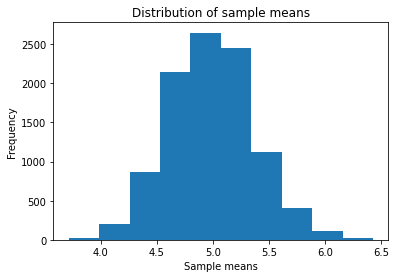

In [10]:
plt.hist(sample2_means)
plt.xlabel('Sample means')
plt.ylabel('Frequency')
plt.title('Distribution of sample means')

**Check - The average of the sample means and sample standard deviation should be close to the true population mean 5 and true standard deviation 2.242 respectively**

In [11]:
print('Mean of the sample means', np.mean(sample2_means))
print('Mean of the sample standard deviations', np.mean(sample2_std))

Mean of the sample means 4.990471428571429
Mean of the sample standard deviations 2.1921715949417635


**Check - standard error of the sample means**

In [12]:
print('Standard error of the sample means with sample size 35', 2.242 / np.sqrt(35))

Standard error of the sample means with sample size 35 0.37896716782026685


**Check - standard error of the sample means should decrease as the sample size increases (`n=50`):**

In [13]:
sample2_means = []
for i in range(10000):
  sample = np.random.choice(sample2, 50) # Randomly sample 50 values from sample2 with replacement
  sample2_means.append(np.mean(sample))

print('Standard error of the sample means with sample size 50', 2.242 / np.sqrt(50))

Standard error of the sample means with sample size 50 0.3170666806840479


**Check - standard error of the sample means should increase as the sample size decreases (`n=28`):**

In [14]:
sample2_means = []
for i in range(10000):
  sample = np.random.choice(sample2, 28) # Randomly sample 28 values from sample2 with replacement
  sample2_means.append(np.mean(sample))

print('Standard error of the sample means with sample size 28', 2.242 / np.sqrt(28))

Standard error of the sample means with sample size 28 0.4236981742433437


### 3. The Central Limit Theorem applies even to binomial populations provided that the minimum of `np` and `n(1-p)` is at least `5`, where `n` refers to the sample size, and `p` is the probability of "success" on any given trial.

In [15]:
# True population with binomial distribution
np.random.seed(128)

n, p = 30, 0.5
# Check if minimum of np and n(1-p) is at least 5
print('Minimum of np and n(1-p) is', min(n*p, n*(1-p)))
# Binomial mean = n * p
print('Mean of the binomial distrbution with n=30 and p=0.5 is', n*p)

# Tossing a coin (p=0.5) 30 times and note the number of heads and tails, repeat it 100000 times
sample3 = np.random.binomial(n, p, 100000) # success rate 'p'=0.5, sample_size=100000

Minimum of np and n(1-p) is 15.0
Mean of the binomial distrbution with n=30 and p=0.5 is 15.0


**Check - distribution of number of heads is normal**

Text(0.5, 1.0, 'Distribution of "number of heads" in 30 coin tosses')

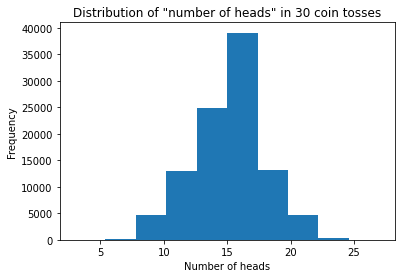

In [16]:
# Histogram showing the distribution of samples with their frequencies on y axis
plt.hist(sample3)
plt.xlabel('Number of heads')
plt.ylabel('Frequency')
plt.title('Distribution of "number of heads" in 30 coin tosses')

**Check - By Law of Large Numbers, as the sample size increases, the mean of the above distribution should be close the true population mean `15`**

In [17]:
print('Mean of "number of heads" after flipping a coin 30 times, repeating it 100000 times is', np.mean(sample3))

Mean of "number of heads" after flipping a coin 30 times, repeating it 100000 times is 15.0033


**Check - If the minimum of `np` and `n(1-p)` is below 5, the CLT will not hold, meaning the distribution of sample means will not be normal**

In [18]:
# True population with binomial distribution
np.random.seed(128)

n, p = 5, 0.2
# Check if minimum of np and n(1-p) is at least 5
print('Minimum of np and n(1-p) is', min(n*p, n*(1-p)))
# Binomial mean = n * p
print('Mean of the binomial distrbution with n=5 and p=0.2 is', n*p)

# Tossing a coin (p=0.2) 5 times and note the number of heads and tails, repeat it 100000 times
sample3 = np.random.binomial(n, p, 100000) # success rate 'p'=0.2, sample_size=100000

Minimum of np and n(1-p) is 1.0
Mean of the binomial distrbution with n=5 and p=0.2 is 1.0


**Check - the distribution is not normal**

Text(0.5, 1.0, 'Distribution of "number of heads" in 5 coin tosses')

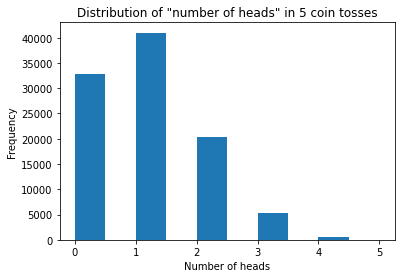

In [19]:
# Histogram showing the distribution of samples with their frequencies on y axis
plt.hist(sample3)
plt.xlabel('Number of heads')
plt.ylabel('Frequency')
plt.title('Distribution of "number of heads" in 5 coin tosses')